<a href="https://colab.research.google.com/github/Mr94t3z/oray/blob/master/Image_Compression_with_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install progress

  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=046c42529a820ce8bef110e7075966c2d181f7f88f11b5a29ee22313f817e5aa
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress


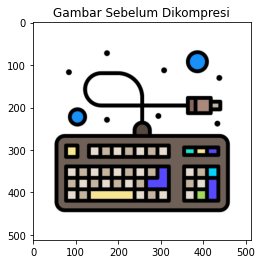


Gambar sedang dikompresi, mohon ditunggu...

# Simpan sebagai nama file:
> keyboard



Gambar berhasil disimpan!



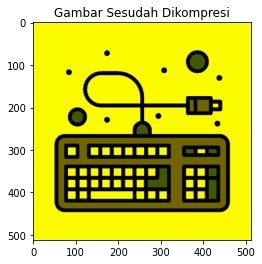

In [10]:
import cv2
import time
import imageio
import imageio.core.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img


def silence_imageio_warning(*args, **kwargs):
    pass


imageio.core.util._precision_warn = silence_imageio_warning


def read_image():
    # memuat gambar png sebagai matriks 3d
    img = cv2.imread('keyboard.png')

    # menampilkan gambar sebelum dikompres
    plt.title('Gambar Sebelum Dikompresi')
    plt.imshow(img)  # merencanakan gambar
    plt.show()

    # menskalakannya sehingga nilainya kecil
    img = img / 255

    return img


def initialize_means(img, clusters):
    # membentuk kembali atau meratakannya menjadi matriks 2d
    points = np.reshape(img, (img.shape[0] * img.shape[1],
                              img.shape[2]))
    m, n = points.shape

    # clusters adalah jumlah cluster
    # atau jumlah warna yang kita pilih.

    # mean adalah larik dari mean atau centroid yang diasumsikan.
    means = np.zeros((clusters, n))

    # inisialisasi means secara acak.
    for i in range(clusters):
        rand1 = int(np.random.random(1) * 10)
        rand2 = int(np.random.random(1) * 8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]

    return points, means


# Berfungsi untuk mengukur euclidean
# jarak (rumus jarak)
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)

    return dist


def k_means(points, means, clusters):
    iterations = 10  # jumlah iterasi
    m, n = points.shape

    # ini adalah nilai indeks yang
    # sesuai dengan cluster untuk
    # yang dimiliki setiap piksel.
    index = np.zeros(m)

    # k-means algorithm
    while (iterations > 0):

        for j in range(len(points)):

            # inisialisasi nilai minimum ke nilai besar
            minv = 1000
            temp = None

            for k in range(clusters):

                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]

                if (distance(x1, y1, x2, y2) < minv):
                    minv = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k

        for k in range(clusters):

            sumx = 0
            sumy = 0
            count = 0

            for j in range(len(points)):

                if (index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1]
                    count += 1

            if (count == 0):
                count = 1

            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)

        iterations -= 1

    return means, index


def compress_image(means, index, img):
    # memulihkan gambar terkompresi dengan
    # menetapkan setiap piksel ke centroid yang sesuai.
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]

    # mendapatkan kembali matriks 3d (row, col, rbg(3))
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
                                       img.shape[2]))

    # menampilkan gambar sesudah dikompres
    plt.title('Gambar Sesudah Dikompresi')
    # merencanakan gambar terkompresi.
    plt.imshow(recovered)

    # menyimpan gambar terkompresi.
    save_as = input('\n# Simpan sebagai nama file:\n> ')
    imageio.imsave('compressed_' + save_as + '_' + str(clusters) +
                   '_colors.png', recovered)

    # progress bar
    print('\n')
    from progress.bar import Bar
    with Bar('Menyimpan', max=100) as bar:
        for i in range(100):
            time.sleep(0.01)
            bar.next()

    # selesai.
    print('\nGambar berhasil disimpan!\n')
    plt.show()  # menampilkan gambar


# Driver code
if __name__ == '__main__':
    img = read_image()

    clusters = 16
    clusters = int(
        input('# Masukkan jumlah warna pada kompresi gambar, default = 16:\n> '))

    print('\nGambar sedang dikompresi, mohon ditunggu...')
    points, means = initialize_means(img, clusters)
    means, index = k_means(points, means, clusters)
    compress_image(means, index, img)